In [22]:
import pandas as pd
import utils
from importlib import reload
import utils
reload(utils)
import seaborn as sns
import scipy.stats as stats

In [2]:
file = 'phone_dist_data/UN_human_rights.csv'

In [3]:
df = pd.read_csv(('/Users/hannes/Documents/Programming/GitHub/GenIpA/phone_dist_data/UN_human_rights.csv'))

## orthographic distance

In [4]:
df = df.drop(columns=['Article'])

In [5]:
df.head()

,English,German,Swedish
0,All human beings are born free and equal in di...,Alle Menschen sind frei und gleich an Würde un...,Alla människor är födda fria och lika i värde ...
1,Everyone is entitled to all the rights and fre...,Jeder hat Anspruch auf alle in dieser Erklärun...,Var och en är berättigad till alla de rättighe...
2,"Everyone has the right to life, liberty and se...","Jeder hat das Recht auf Leben, Freiheit und Si...","Var och en har rätt till liv, frihet och perso..."
3,No one shall be held in slavery or servitude; ...,Niemand darf in Sklaverei oder Leibeigenschaft...,Ingen får hållas i slaveri eller träldom; slav...
4,No one shall be subjected to torture or to cru...,"Niemand darf der Folter oder grausamer, unmens...","Ingen får utsättas för tortyr eller grym, omän..."


In [6]:
utils.normalized_edit_distance(df.English[0], df.German[0])

0.7125748502994012

In [7]:
utils.normalized_edit_distance(df.English[0], df.Swedish[0])

0.7454545454545455

In [8]:
len(df.German[0])

164

In [9]:
df["orth_dist_en_se"] = 0
df['orth_dist_de_se'] = 0
df['orth_dist_en_de'] = 0
for i in range(len(df)):
    df['orth_dist_en_de'].iloc[i] = utils.normalized_edit_distance(df.English[i], df.German[i])
    df['orth_dist_en_se'].iloc[i] = utils.normalized_edit_distance(df.English[i], df.Swedish[i])
    df['orth_dist_de_se'].iloc[i] = utils.normalized_edit_distance(df.Swedish[i], df.German[i])

In [10]:
df.head()

,English,German,Swedish,orth_dist_en_se,orth_dist_de_se,orth_dist_en_de
0,All human beings are born free and equal in di...,Alle Menschen sind frei und gleich an Würde un...,Alla människor är födda fria och lika i värde ...,0.745455,0.728395,0.712575
1,Everyone is entitled to all the rights and fre...,Jeder hat Anspruch auf alle in dieser Erklärun...,Var och en är berättigad till alla de rättighe...,0.652427,0.716364,0.680374
2,"Everyone has the right to life, liberty and se...","Jeder hat das Recht auf Leben, Freiheit und Si...","Var och en har rätt till liv, frihet och perso...",0.699187,0.746032,0.604651
3,No one shall be held in slavery or servitude; ...,Niemand darf in Sklaverei oder Leibeigenschaft...,Ingen får hållas i slaveri eller träldom; slav...,0.620370,0.753247,0.763485
4,No one shall be subjected to torture or to cru...,"Niemand darf der Folter oder grausamer, unmens...","Ingen får utsättas för tortyr eller grym, omän...",0.789744,0.672811,0.792453


In [12]:
df.describe()

,orth_dist_en_se,orth_dist_de_se,orth_dist_en_de
count,30.000000,30.000000,30.000000
mean,0.729232,0.766133,0.762989
std,0.054757,0.041094,0.049004
min,0.608392,0.672811,0.604651
25%,0.716662,0.745794,0.750707
50%,0.733845,0.760545,0.768703
75%,0.749860,0.802076,0.787155
max,0.880597,0.840764,0.864516


<Axes: >

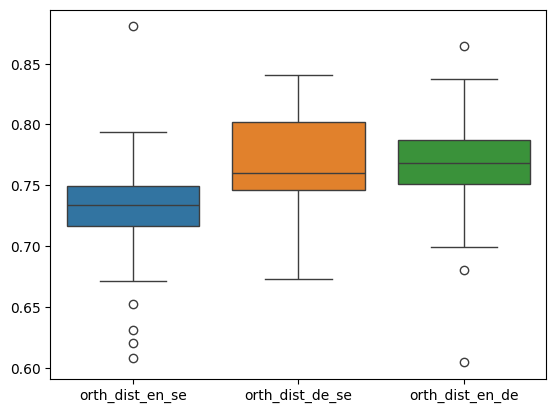

In [20]:
sns.boxplot(data = df)

In [24]:
stats.mannwhitneyu(df.orth_dist_en_de, df.orth_dist_en_se)

MannwhitneyuResult(statistic=660.0, pvalue=0.0019526766739305424)

In [25]:
stats.mannwhitneyu(df.orth_dist_en_de, df.orth_dist_de_se)

MannwhitneyuResult(statistic=451.0, pvalue=0.9941019213254952)

In [26]:
stats.mannwhitneyu(df.orth_dist_en_se, df.orth_dist_de_se)

MannwhitneyuResult(statistic=242.0, pvalue=0.002156637821229769)

## phonetic distance

In [31]:
df["English_ipa"] = 0
df['German_ipa'] = 0
df['Swedish_ipa'] = 0
for i in range(len(df)):
    df['English_ipa'].iloc[i] = utils.get_ipa_openai(df.English[i])
    df['German_ipa'].iloc[i] = utils.get_ipa_openai(df.German[i])
    df['Swedish_ipa'].iloc[i] = utils.get_ipa_openai(df.Swedish[i])

KeyboardInterrupt: 

In [35]:
df

,English,German,Swedish,orth_dist_en_se,orth_dist_de_se,orth_dist_en_de,English_ipa,German_ipa,Swedish_ipa
0,All human beings are born free and equal in di...,Alle Menschen sind frei und gleich an Würde un...,Alla människor är födda fria och lika i värde ...,0.745455,0.728395,0.712575,/ɔːl ˈhjuːmən ˈbiːɪŋz ɑːr bɔːrn friː ænd ˈiːkw...,0,0
1,Everyone is entitled to all the rights and fre...,Jeder hat Anspruch auf alle in dieser Erklärun...,Var och en är berättigad till alla de rättighe...,0.652427,0.716364,0.680374,0,0,0
2,"Everyone has the right to life, liberty and se...","Jeder hat das Recht auf Leben, Freiheit und Si...","Var och en har rätt till liv, frihet och perso...",0.699187,0.746032,0.604651,0,0,0
3,No one shall be held in slavery or servitude; ...,Niemand darf in Sklaverei oder Leibeigenschaft...,Ingen får hållas i slaveri eller träldom; slav...,0.620370,0.753247,0.763485,0,0,0
4,No one shall be subjected to torture or to cru...,"Niemand darf der Folter oder grausamer, unmens...","Ingen får utsättas för tortyr eller grym, omän...",0.789744,0.672811,0.792453,0,0,0
5,Everyone has the right to recognition everywhe...,Jeder hat überall Anspruch auf Anerkennung als...,Var och en har rätt att överallt erkännas som ...,0.716216,0.805755,0.797203,0,0,0
6,All are equal before the law and are entitled ...,Alle Menschen sind vor dem Gesetz gleich und h...,Alla är lika inför lagen och har rätt till lik...,0.726514,0.744094,0.772983,0,0,0
7,Everyone has the right to an effective remedy ...,Jeder hat Anspruch auf einen wirksamen Rechtsb...,Var och en har rätt till ett verksamt rättsmed...,0.730245,0.779156,0.836957,0,0,0
8,"No one shall be subjected to arbitrary arrest,...","Niemand darf willkürlich festgenommen, in Haft...","Ingen får godtyckligt anhållas, hållas fängsla...",0.880597,0.840764,0.864516,0,0,0
9,Everyone is entitled in full equality to a fai...,Jeder hat bei der Feststellung seiner Rechte u...,Var och en är på fullständig jämlik fot berätt...,0.784038,0.824268,0.795556,0,0,0


In [36]:
for i in range(len(df)):
    df['English_ipa'].iloc[i] = utils.get_ipa_openai(df.English[i])

In [38]:
df['German_ipa'] = 0
df['Swedish_ipa'] = 0
for i in range(len(df)):
    df['German_ipa'].iloc[i] = utils.get_ipa_openai(df.German[i])
    df['Swedish_ipa'].iloc[i] = utils.get_ipa_openai(df.Swedish[i])

In [41]:
df[['English_ipa', 'German_ipa', 'Swedish_ipa']]

,English_ipa,German_ipa,Swedish_ipa
0,/ɔːl ˈhjuːmən ˈbiːɪŋz ɑːr bɔːrn friː ænd ˈiːkw...,/ˈalə ˈmɛnʃən zɪnt fraɪ ʊnt ɡlaiç an ˈvʏrdə ʊn...,/ˈalːa ˈmɛnːɪskʊr ɛr ˈfœdːa ˈfrɪːa ɔk ˈliːka i...
1,/ˈɛvrɪwʌn ɪz ɪnˈtaɪtəld tuː ɔːl ðə raɪts ænd ˈ...,/ˈjeːdɐ hat ˈanʃpraʊx aʊf ˈalə ɪn ˈdɪzɐ ɛrˈklɛ...,/ˈvar ɔk ˈɛn ɛr bɛˈrɛtːɪɡad tɪl ˈalːa dɛ ˈrɛtː...
2,"/ˈɛvrɪwʌn hæz ðə raɪt tu laɪf, ˈlɪbərti ænd sɪ...","/ˈjeːdɐ hat das ʁɛçt aʊf ˈliːbən, ˈfʁaɪhaɪt ʊn...","/ˈvar ɔk ˈɛn har rɛt til liːv, ˈfriːhɛt ɔk pɛr..."
3,/noʊ wʌn ʃæl bi hɛld ɪn ˈsleɪvəri ɔr ˈsɜrvɪˌtu...,/ˈniːmant darf ɪn ˈʃlaːvəraɪ oːɐ̯ ˈlaɪ̯baɪ̯ɡən...,/ˈɪŋɛn fɔr ˈhɔlːas ɪ ˈslɑːvɛrɪ ɛlɛr ˈtrɛlːdʊm;...
4,/noʊ wʌn ʃæl bi səbˈdʒɛktɪd tu ˈtɔrtʃər ɔr tu ...,/ˈniːmant dɑrf deːɐ ˈfɔltɐ oːɐ ˈɡʁaʊzamɐ ˈʊnmɛ...,/ˈɪŋɛn fɔːr ²ɵtˌsɛtːas fœr tʊrˈtyːr ɛlɛr ²ɡryː...
5,/ˈɛvrɪwʌn hæz ðə raɪt tuː ˌrɛkəɡˈnɪʃən ˈɛvrɪwɛ...,/ˈjeːdɐ hat ˈyːbɐal ˈʔanˌʃprʊx aʊf ˌʔanɐˈkɛnʊŋ...,/ˈvɑːr ɔk ˈɛn har rɛt ɑt ˈœvɛrˌal ɛrkɛnˈnɑs sɔ...
6,/ɔl ɑr ˈikwəl bɪˈfɔr ðə lɔ ənd ɑr ɪnˈtaɪtəld w...,/ˈalə ˈmɛnʃən zɪnt foːɐ deːm ˈlɛts ɡlaɪç ʊnt ˈ...,/ˈalːa ær ˈliːka ˈɪnˌføːr ˈlɑːɡɛn ɔk har rɛtː ...
7,/ˈɛvrɪwʌn hæz ðə raɪt tuː ən ɪˈfɛktɪv ˈrɛmədi ...,/ˈjeːdɐ hat ˈanˌʃprʊç aʊf ˈaɪnən ˈvɪʁksamən ˈʁ...,/ˈvɑːr ɔk ˈɛn har rɛtː til ɛt ˈvæɾkˌsamt ˈrɛtː...
8,/noʊ wʌn ʃæl bi səbˈdʒɛktɪd tuː ˈɑːrbɪˌtrɛri ə...,"/ˈniːmant dɑrf ˈvɪlkœrliç ˈfɛstɡənɔmən, ɪn haf...","/ˈɪŋɛn fɔr ˈɡuːdʏkɛlɪt ˈanˌhɔlːas, ˈhɔlːas ˈfɛ..."
9,/ˈɛvrɪwʌn ɪz ɪnˈtaɪtəld ɪn fʊl ɪˈkwɒlɪti tuː ə...,/ˈjeːdɐ hat baɪ deːɐ fɛstˈʃtɛlʊŋ zɪnɐ ˈʁɛçtə ʊ...,/ˈvɑr ɔk ˈɛn ɛr ˈpɔ fɵlˈstɛnːdɪɡ ˈjɛmːlɪk fʊt ...


In [44]:
df[['English_ipa', 'German_ipa', 'Swedish_ipa']].to_csv('phone_dist_data/UN_human_rights_ipa.csv')